# Image classification
Simple image classifier over fashion items using the fashion mnist dataset

In [1]:
import keras

Using TensorFlow backend.


Here we import the right keras packages. This includes Conv2D which is keras' convolutional neural network layer

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

from keras.datasets import fashion_mnist
import numpy as np
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding


Loading the Fashion MNIST data set. This data set contains the follow categories of fashion items - each training and test example is assigned to one of the following labels:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [5]:
# 60000 training images with 28x28 pixels
print(np.shape(x_train))
# 60000 labels
print(np.shape(y_train))

# 10000 test images with 28x28 pixels
print(np.shape(x_test))
# 10000 labels
print(np.shape(y_test))

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


The images consist of grayscale values between 0.0 and 255.0. Here, we normalize them by dividing the whole data arrays by 255.0. Doing this aligns them in the range 0-1. This is done to reduce errors with too large ranges for our gradient function in our neural network.

In [6]:
test_data = np.asarray(x_test / 255.0 , dtype=float)
train_data = np.asarray(x_train / 255.0 , dtype=float)
test_labels= np.asarray(y_test , dtype=np.int32)
train_labels = np.asarray(y_train , dtype=np.int32)

We can use matplotlib to view the images within the notebook. Here we define a simple function for use later to draw out images using matplotlib

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt

def plot_images(imgs, rows=1, figsize=(20,8), fontsize=14):
    figure = plt.figure(figsize=figsize)
    cols = max(1,len(imgs) // rows-1)
    for i in range(len(imgs)):
        subplot = figure.add_subplot(rows, cols+1, i+1)
        plt.tick_params(
            axis='both',
            which='both',
            bottom=False,
            top=False,
            left=False,
            right=False,
            labelbottom=False,
            labelleft=False)
        plt.imshow(imgs[i][:,:], cmap='Greys')
        
    plt.show()

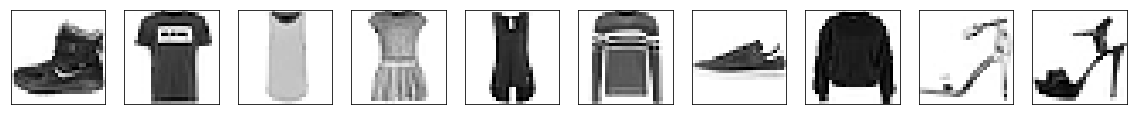

In [15]:
plot_images(x_train[0:10])

Let's define a function that builds the Keras model architecture for a convolutional network

In [16]:
def build_model():
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape = (28, 28, 1)))
    model.add(MaxPool2D(strides=(2,2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=1e-3), metrics=["accuracy"])
    
    return model

In [17]:
x_train_data = train_data.reshape(-1, 28, 28, 1)
y_train_data = to_categorical(train_labels)

print(np.shape(x_train_data))
print(np.shape(y_train_data))

x_test_data = test_data.reshape(-1, 28, 28, 1)
y_test_data = to_categorical(test_labels)
print(np.shape(x_test_data))
print(np.shape(y_test_data))

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [18]:
model = build_model()

training_history = model.fit(x_train_data,
                     y_train_data,
                     epochs=10,
                     verbose=1,
                     batch_size=32,
                     validation_data=(x_test_data, y_test_data)
                )

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 24s 402us/step - loss: 0.4054 - acc: 0.8572 - val_loss: 0.3368 - val_acc: 0.8768
Epoch 2/10
60000/60000 [==============================] - 26s 430us/step - loss: 0.2747 - acc: 0.9020 - val_loss: 0.3025 - val_acc: 0.8872
Epoch 3/10
60000/60000 [==============================] - 25s 423us/step - loss: 0.2307 - acc: 0.9153 - val_loss: 0.2636 - val_acc: 0.9058
Epoch 4/10
60000/60000 [==============================] - 25s 412us/step - loss: 0.2015 - acc: 0.9257 - val_loss: 0.2600 - val_acc: 0.9083
Epoch 5/10
60000/60000 [==============================] - 26s 429us/step - loss: 0.1764 - acc: 0.9352 - val_loss: 0.2489 - val_acc: 0.9124
Epoch 6/10
60000/60000 [==============================] - 24s 400us/step - loss: 0.1573 - acc: 0.9415 - val_loss: 0.2638 - val_acc: 0.9

In [19]:
training_history.history

{'val_loss': [0.33681597347259523,
  0.30247321590185167,
  0.26362250053882597,
  0.2600263224720955,
  0.24890633507966994,
  0.26377828946113585,
  0.26836037242114547,
  0.27002424339056014,
  0.27355366789102553,
  0.2883227875232697],
 'val_acc': [0.8768,
  0.8872,
  0.9058,
  0.9083,
  0.9124,
  0.9077,
  0.912,
  0.915,
  0.9142,
  0.913],
 'loss': [0.4054421124438445,
  0.2747300923079252,
  0.23072507253438235,
  0.2014865179648002,
  0.17638153814077379,
  0.15727388691256444,
  0.13678180876150728,
  0.1217364121456941,
  0.10904231215299418,
  0.09622375573373089],
 'acc': [0.85715,
  0.90205,
  0.9153333333333333,
  0.9257333333333333,
  0.93515,
  0.9415166666666667,
  0.9500833333333333,
  0.9556166666666667,
  0.96075,
  0.96465]}

Let's plot the training metrics

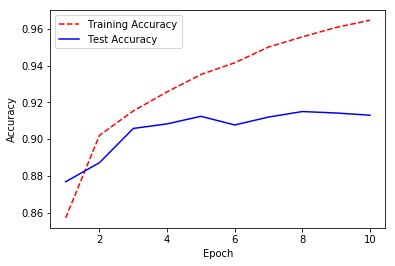

In [20]:
epoch_count = range(1, len(training_history.history['val_acc']) + 1)
plt.plot(epoch_count, training_history.history['acc'], 'r--')
plt.plot(epoch_count, training_history.history['val_acc'], 'b-')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

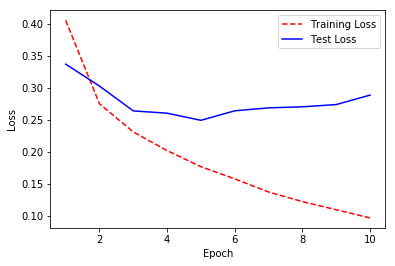

In [21]:
epoch_count = range(1, len(training_history.history['val_loss']) + 1)
plt.plot(epoch_count, training_history.history['loss'], 'r--')
plt.plot(epoch_count, training_history.history['val_loss'], 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

### Trying it out
Let's test our trained model and demonstrate how it can be used to classify an image

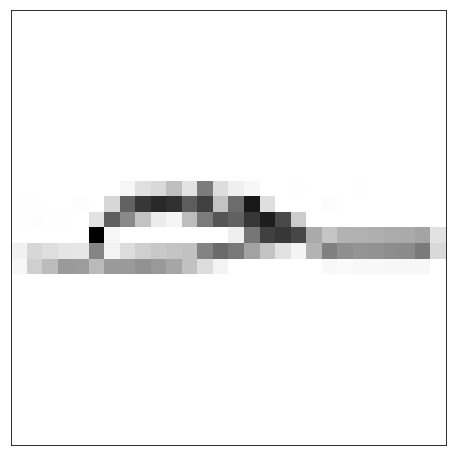

In [22]:
plot_images([x_test[8]])

In [23]:
labels=['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
pred = model.predict(np.expand_dims(x_test_data[8], axis=0))
labels[np.argmax(pred)]

'Sandal'